In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import models
import utils
import os

In [2]:
def bezier(p, steps=100):
    t = np.linspace(0, 1, steps).reshape(-1, 1)
    curve = np.power(1-t, 3)*p[0] + 3*np.power(1-t, 2)*t*p[1] + 3*(1-t)*np.power(t, 2)*p[2] + np.power(t, 3)*p[3]
    return curve

In [3]:
model = models.CNP((3, 16), 256, 2, 0.01)

In [5]:
model_directory = os.getcwd().replace("\\", "/") + "/save/learning_rate0005/num_hidden_2/max_context_300/200000_5/"
state_dict = torch.load(model_directory+ "model.pt")

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [59]:
state_dict["model_state_dict"].keys()

odict_keys(['encoder.0.weight', 'encoder.0.bias', 'encoder.2.weight', 'encoder.2.bias', 'encoder.4.weight', 'encoder.4.bias', 'query.0.weight', 'query.0.bias', 'query.2.weight', 'query.2.bias', 'query.4.weight', 'query.4.bias'])

In [60]:
state_dict["model_state_dict"]["encoder.0.weight"].size()

torch.Size([256, 19])

In [61]:
model.load_state_dict(state_dict["model_state_dict"])

<All keys matched successfully>

In [62]:
model.eval()

CNP(
  (encoder): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
  (query): Sequential(
    (0): Linear(in_features=259, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
)

In [63]:
data = torch.load("/home/colors/Desktop/Cappuccino-Preparing-Robot-Baxter/carry_data/train5/train.pt")

In [65]:
data["carry_1_1.csv"].shape

torch.Size([4107, 19])

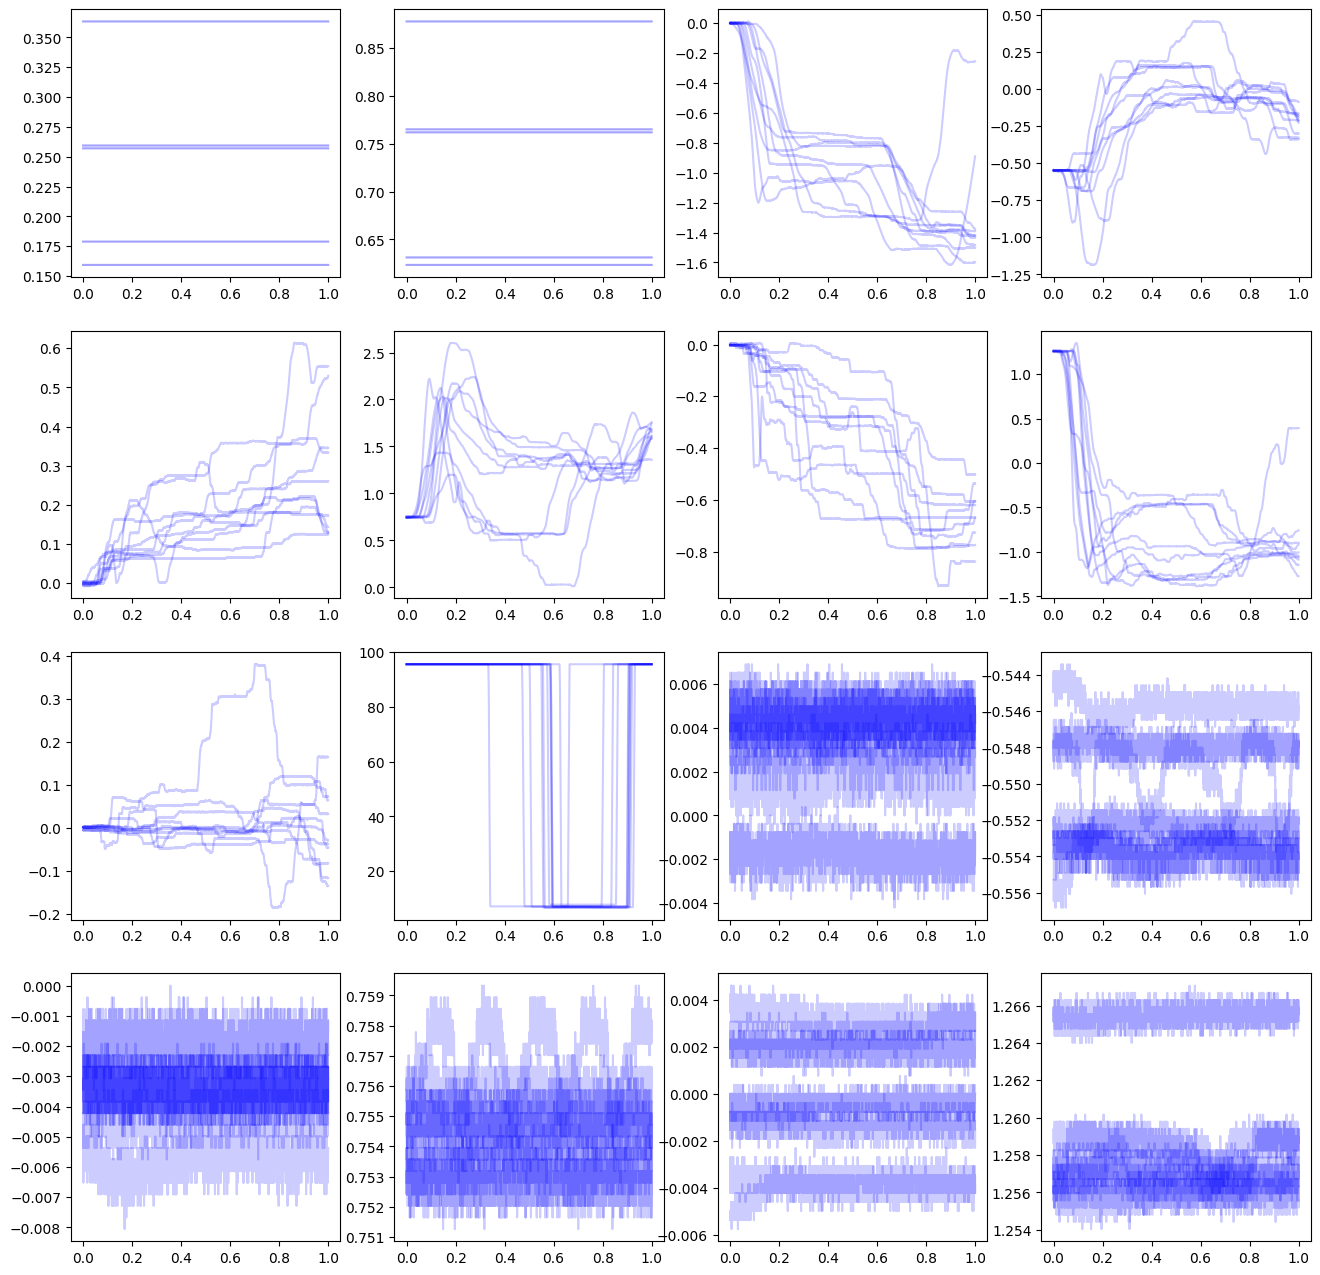

In [66]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for x in range(5):
    for y in range(2):
        for i in range(4):
            for j in range(4):
                it = i * 4 + j
                ax[i][j].plot(data[f"carry_{x+1}_{y+1}.csv"][:, 0], data[f"carry_{x+1}_{y+1}.csv"][:, it+1], c="b", alpha=0.2)
fig.savefig(model_directory + "data.png")

In [67]:
traj = data["carry_1_1.csv"]

In [69]:
traj = traj.unsqueeze(0)

In [70]:
print(traj[:, [0, 1, 2, -1, -2, -3]].shape)
print(traj[:, :, [0]].shape)

torch.Size([1, 6, 19])
torch.Size([1, 4107, 1])


In [72]:
mean, std = model(observation=traj[:, :], target=traj[:, :, [0,1,2]])
mean = mean.detach()
std = std.detach()

In [73]:
observation=traj[:, [0, 1, 3000, 3001]]

In [75]:
model(observation=traj[:, [0, 1, 3000, 3001]],
      target=torch.tensor([
          [
              [0.1, 0.25703125,0.76171875],
              [0.2, 0.25703125,0.76171875,],
              [0.7, 0.25703125,0.76171875,],
          ]
      ]))

(tensor([[[-1.5859e-01, -5.9860e-01,  4.9900e-02,  1.0457e+00, -1.9199e-02,
            7.7268e-01,  6.5769e-03,  9.5657e+01,  4.8269e-03, -5.5285e-01,
           -4.6425e-03,  7.5597e-01,  4.6071e-04,  1.2590e+00,  1.8739e-03,
            1.0000e+02],
          [-6.9474e-01, -4.8323e-01,  9.7359e-02,  1.8967e+00, -1.1270e-01,
           -9.0649e-01,  1.9133e-02,  9.5638e+01,  5.4071e-03, -5.5368e-01,
           -5.2919e-03,  7.5675e-01,  1.3365e-03,  1.2582e+00,  1.7934e-03,
            1.0000e+02],
          [-1.1945e+00, -1.0111e-01,  1.4298e-01,  1.4475e+00, -4.5284e-01,
           -1.1743e+00, -9.5851e-03,  3.1040e+01,  5.0910e-03, -5.5328e-01,
           -4.7169e-03,  7.5624e-01,  1.2289e-03,  1.2576e+00,  1.7481e-03,
            1.0001e+02]]], grad_fn=<SliceBackward0>),
 tensor([[[1.1513e-01, 5.4927e-02, 2.6421e-02, 2.2635e-01, 1.9318e-02,
           5.8571e-01, 1.2340e-02, 1.4164e-01, 1.0000e-02, 1.0000e-02,
           1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,

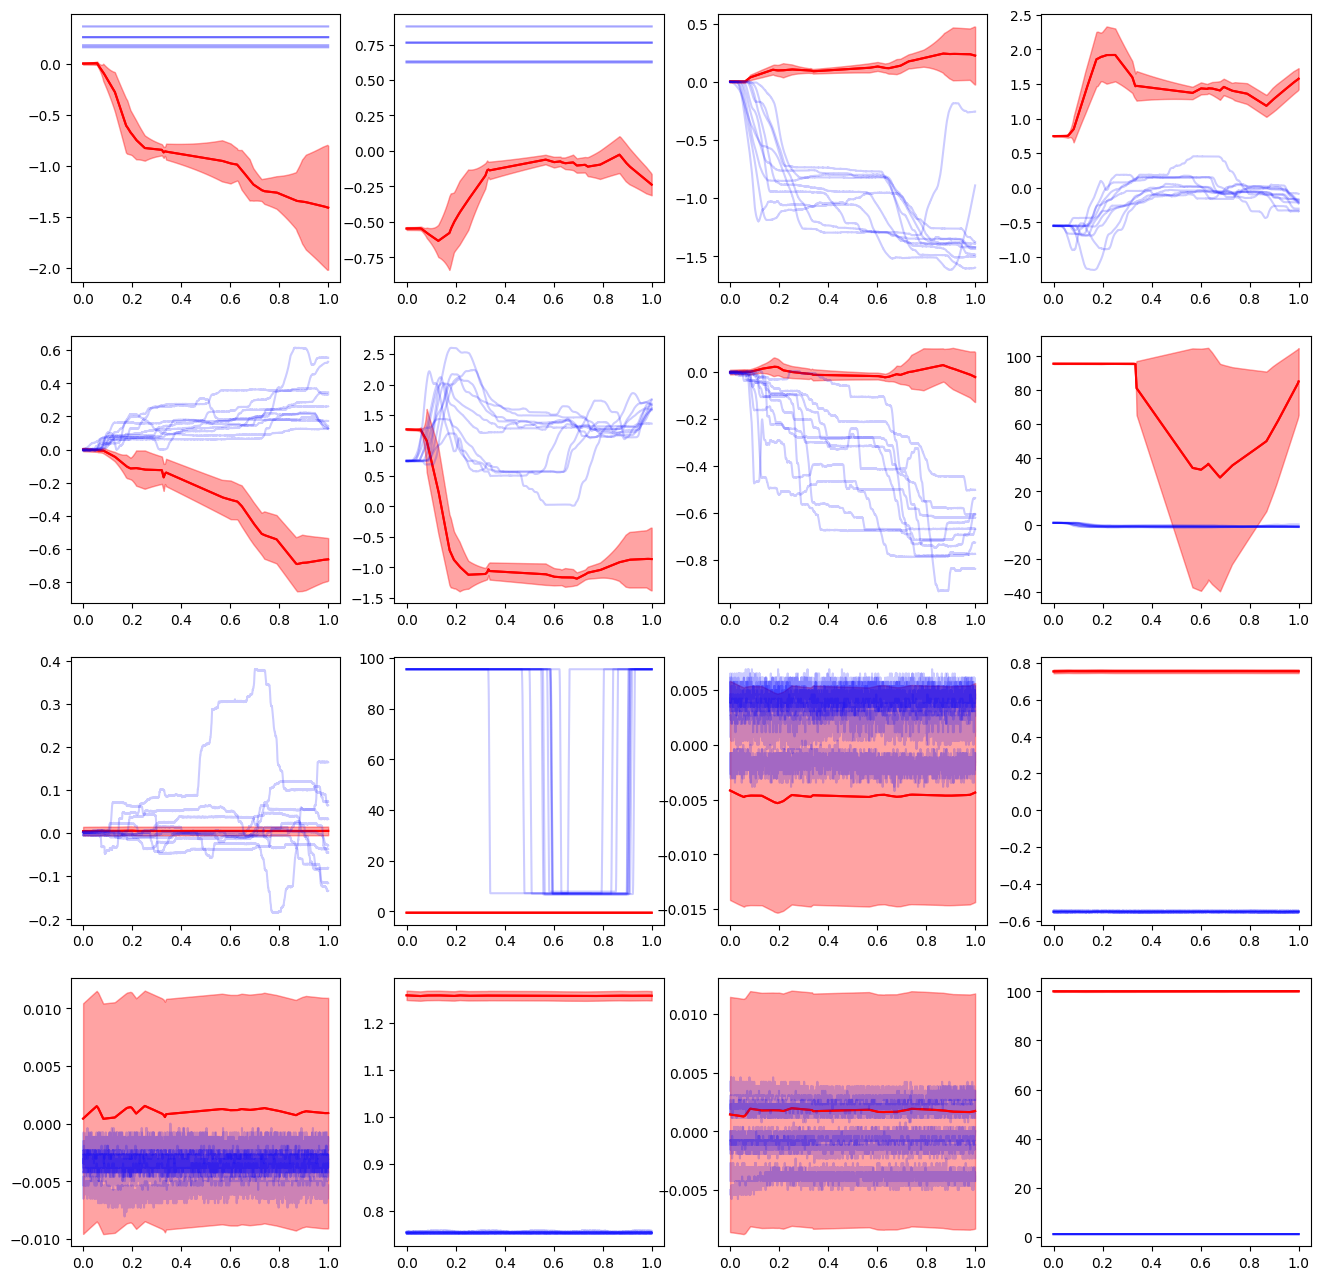

In [76]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for x in range(5):
    for y in range(2):
        for i in range(4):
            for j in range(4):
                it = i * 4 + j
                ax[i][j].plot(data[f"carry_{x+1}_{y+1}.csv"][:, 0], data[f"carry_{x+1}_{y+1}.csv"][:, it+1], c="b", alpha=0.2)
                if x == 0:
                    ax[i][j].plot(torch.linspace(0, 1, mean.shape[1]), mean[0][:, it], c="r")
                    ax[i][j].fill_between(torch.linspace(0, 1, mean.shape[1]), mean[0][:, it] - std[0][:, it],
                                        mean[0][:, it] + std[0][:, it], color="r", alpha=0.2)
fig.savefig(model_directory+"output.png")

In [77]:
test_predictions = torch.load(model_directory+"test_predictions.pt")

FileNotFoundError: [Errno 2] No such file or directory: 'save/learning_rate0005/num_hidden_2/max_context_300/200000_5/test_predictions.pt'

In [ ]:
test_predictions.keys()

dict_keys(['carry_2_3.csv', 'carry_5_3.csv', 'carry_3_3.csv', 'carry_4_3.csv', 'carry_1_3.csv'])

In [ ]:
test_predictions["carry_2_3.csv"].keys()

dict_keys(['mean', 'std'])